In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


import os

os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin\\'
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML

style = "<style>svg{width:100% !important;height:100% !important;}</style>"
HTML(style)

In [2]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_data_tree.csv')

In [3]:
X = df.drop(['num'],axis=1)
y = df.num

In [4]:
clf = tree.DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
parametrs = {'criterion': ['entropy'], 'max_depth': range(1, 30)}
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': range(1, 30)})

In [5]:
grid_search_cv_clf.best_params_


{'criterion': 'entropy', 'max_depth': 2}

In [6]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf.score(X_test, y_test)

0.759493670886076

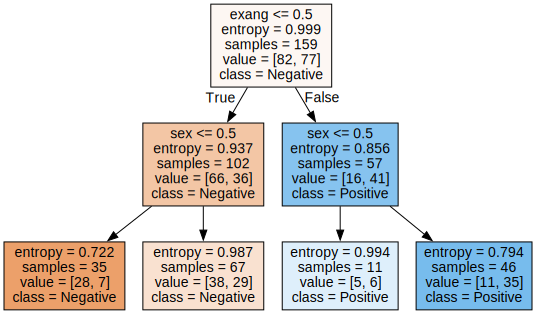

In [14]:
graph = Source(tree.export_graphviz(best_clf, out_file=None,
                                    feature_names=list(X),
                                    class_names=['Negative', 'Positive'],
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

In [20]:
L = df.shape[0]
Ln1 = df[df.num == 1].shape[0]
Ln0 = df[df.num == 0].shape[0]
EY = -Ln1/L * np.log2(Ln1/L) - Ln0/L * np.log2(Ln0/L)



0.9958699965528488


In [29]:
Lex0 = df[df.exang == 0].shape[0]
Lex1 = df[df.exang == 1].shape[0]
Lex00 = df[(df.exang == 0) & (df.num == 0)].shape[0]
Lex01 = df[(df.exang == 0) & (df.num == 1)].shape[0]
Lex10 = df[(df.exang == 1) & (df.num == 0)].shape[0]
Lex11 = df[(df.exang == 1) & (df.num == 1)].shape[0]

E_exang_true = -Lex10/Lex1 * np.log2(Lex10/Lex1) - (Lex11/Lex1) * np.log2(Lex11/Lex1)
E_exang_false = -Lex00/Lex0 * np.log2(Lex00/Lex0) - (Lex01/Lex0) * np.log2(Lex01/Lex0)


ig1 = EY - (Lex0*E_exang_false + Lex1*E_exang_true)/L

print('Information Gain for exang: %.3f' % ig1)

Information Gain for exang: 0.119


In [34]:
best_clf.tree_.compute_feature_importances(normalize=False)[1]

0.0913923918771195

In [56]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf.fit(df[['sex', 'exang']], df.num)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [57]:
clf.tree_.n_node_samples

array([238, 157,  81], dtype=int64)

In [61]:
clf.tree_.impurity

array([0.99587   , 0.90271134, 0.82562653])